In [2]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input,Add,Dense,Activation,ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Dropout
from keras.models import Model,load_model
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize
import pandas as pd
import keras
import keras.backend as K
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
K.set_image_data_format("channels_last")
tf.random.set_seed(42)

Using TensorFlow backend.


In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [6]:
## Load data ##

training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


In [7]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
## Shape of data ## 
print("Training_data shape : {}".format(training_data.shape))
print("Test_data shape : {}".format(test_data.shape))


Training_data shape : (42000, 785)
Test_data shape : (28000, 784)


In [9]:
## Check if there is missing values ## 
print("Number of columns with missing values in Training dataset : ", len(training_data.columns[training_data.isnull().any()]))
print("Number of columns with missing values in Test dataset : ", len(test_data.columns[test_data.isnull().any()]))

## No missing values :) 

Number of columns with missing values in Training dataset :  0
Number of columns with missing values in Test dataset :  0


In [10]:
## Number of image training/test set ##
number_train_image = training_data.shape[0]
number_test_image = test_data.shape[0]


In [11]:
## Extract labels corresponding to the training data ##
train_labels = np.array(training_data.iloc[:,0])

In [12]:
## Convert training/test datasets from csv format to image pixels (numpy array) ## 

train_image = np.array(training_data.iloc[:,1:]).reshape(number_train_image,28,28)
test_image = np.array(test_data.iloc[:]).reshape(number_test_image,28,28)


In [13]:
## Shape of our new datasets ## 
print("Shape of TRAINING image dataset : {}".format(train_image.shape))
print("Shape of TRAINING label dataset : {}".format(train_labels.shape))
print("Shape of TEST image dataset : {}".format(test_image.shape))


Shape of TRAINING image dataset : (42000, 28, 28)
Shape of TRAINING label dataset : (42000,)
Shape of TEST image dataset : (28000, 28, 28)


In [14]:
## Normalize data ## 
train_image = train_image.astype("float32") / 255.0
test_image = test_image.astype("float32") / 255.0

Corresponding label :0


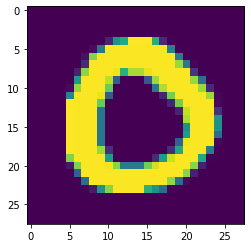

In [15]:
## Display some images from the training data ## 
plt.imshow(train_image[4])
print("Corresponding label :{}".format(train_labels[4]))


In [16]:
## Split the Training data into train and val/dev dataset ## 
X_train,X_val,y_train,y_val = train_test_split(train_image,train_labels,test_size = 0.2)

In [17]:
## Number of images for each class ##
## The different classes have approximately the same proportion of data ## 
dict_labels = dict(zip(*np.unique(train_labels,return_counts = True)))
for key,value in dict_labels.items():
    print("Label : {}".format(key) + " <--> " + "Number of images : {}".format(value))

Label : 0 <--> Number of images : 4132
Label : 1 <--> Number of images : 4684
Label : 2 <--> Number of images : 4177
Label : 3 <--> Number of images : 4351
Label : 4 <--> Number of images : 4072
Label : 5 <--> Number of images : 3795
Label : 6 <--> Number of images : 4137
Label : 7 <--> Number of images : 4401
Label : 8 <--> Number of images : 4063
Label : 9 <--> Number of images : 4188


In [18]:
## Encode labels to one hot matrix ##
def convert_to_one_hot(Y,C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [19]:
## One hot encoding matrix ##

classes = len(np.unique(train_labels))
y_train_encoded = convert_to_one_hot(y_train,classes).T
y_val_encoded = convert_to_one_hot(y_val,classes).T

In [20]:
#### Deep neural network model #### 

def LeNet5_v1(input_shape ,filters,classes):
    
    f1,f2,f3 = filters
    X_input  = Input(input_shape)
    
    X = Conv2D(f1,kernel_size = (5,5) , strides = (1,1) , name ="conv1" , kernel_initializer = "glorot_normal")(X_input)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , name = "maxpool1" )(X)
    X = Dropout(0.1)(X)
    
    X = Conv2D(f2,kernel_size = (5,5) , strides = (1,1) , name = "conv2",kernel_initializer = "glorot_normal")(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , name = "maxpool2")(X)
    
    X = Conv2D(f3,kernel_size = (3,3) , strides = (1,1) , name ="conv3",kernel_initializer = "glorot_normal")(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    
    X = Conv2D(f3,kernel_size = (1,1) , strides = (1,1) , name ="conv4",kernel_initializer = "glorot_normal")(X)
    X = Activation('relu')(X)
    
    
    
    
    
    X = Flatten()(X)
    
    X = Dense(1600,activation = "relu" , name = "FC1")(X)
    X = Dense(1200,activation = "relu" , name = "FC2")(X)
    X = Dropout(0.1)(X)
    X = Dense(1000,activation = "relu", name = "FC3" )(X)
    output_layer = Dense(classes,activation = "softmax" , name = "FC4")(X)
    
    model = Model(inputs = X_input , outputs = output_layer , name = "Lenet-5_v1")
    
    return model
    

In [21]:
## Model ## 
model = LeNet5_v1(input_shape = (28,28,1) ,filters = [32,64,128] , classes = classes)

In [22]:
## Compile our model ##
model.compile(optimizer = "Adam", loss = "categorical_crossentropy" , metrics = ["accuracy","mean_squared_error"])

In [23]:
## Summary of our model ##
model.summary()

Model: "Lenet-5_v1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 24, 24, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 64)          51264     
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 64)          0

In [24]:
## Reshape train/val set to (28,28,1) format. ##

X_train = X_train.reshape(33600,28,28,1)
X_val = X_val.reshape(8400,28,28,1)

In [63]:
## Usin Data augmentation to reduce overfitting ## 
Data_augmentation =ImageDataGenerator(rotation_range= 45, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = Data_augmentation.flow(X_train, y_train_encoded, batch_size=2048 , shuffle = True)
val_batches = Data_augmentation.flow(X_val, y_val_encoded, batch_size=2048, shuffle = True)

In [77]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0)

In [83]:
## Fitting our model ## 

history = model.fit_generator(generator = batches,
                              validation_data = val_batches , epochs = 1 , 
                              steps_per_epoch= len(X_train)//2048 , 
                              validation_steps= len(X_val)//2048,
                              callbacks = [callback])

Epoch 1/1
16/16 [==============================] - 16s 1s/step - loss: 0.0064 - accuracy: 0.9980 - mean_squared_error: 3.2386e-04 - val_loss: 0.0430 - val_accuracy: 0.9933 - val_mean_squared_error: 0.0011


In [84]:
## prediction ##
pred = model.predict(test_image.reshape(28000,28,28,1))

Text(0.5, 1.0, 'Training and Validation Loss')

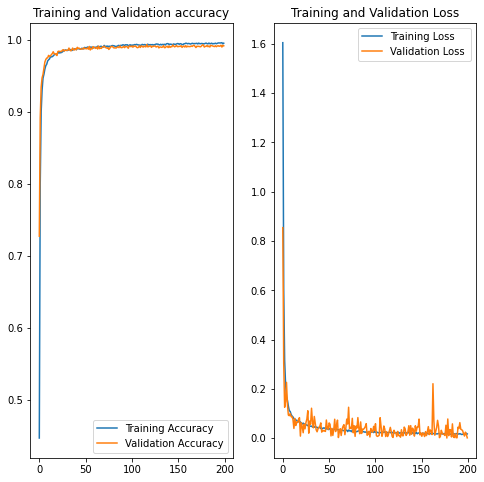

In [28]:
## Curves ## 

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epoch_range = range(200)

## Plot Training & Validation Accuracy ## 
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,acc,label = "Training Accuracy")
plt.plot(epoch_range,val_acc , label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation accuracy")

## Plot Training & Validation loss ## 
plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label = "Training Loss")
plt.plot(epoch_range,val_loss,label = "Validation Loss ")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")

In [85]:
## Create a list corresponding to the prediction of each image in test dataset
pred_test = np.array([])
for i in range(len(pred)):
    pred_test = np.append(pred_test,np.argmax(pred[i]))

In [86]:
## This cell concerns : Kaggle submission ## 

output = pd.DataFrame({'ImageId': [i for i in range(1,28001)],
                       'Label': pred_test.astype(int)})
output.to_csv('submission.csv', index=False)